In [ ]:
import numpy as np
import random as rd
from scipy import random
from scipy.stats import multivariate_normal
from scipy.stats import normal

class csaem:
  def __init__(self,mean,pi,sigma,k,ann_iter,tau,e,alpha,lbd):
    self.mean = mean
    self.pi = pi
    self.sigma = sigma
    self.k = k
    self.ann_iter = ann_iter
    self.tau = tau
    self.e = e
    self.alpha = alpha
    self.lbd = lbd
    self.temp = tau
    self.iter = 1
    self.L = 0

  def process(self):
    while True:
      ohm = self.pi/max(self.pi)
      rem = 0
      rnd = rd.uniform(0,1)
      for q in range(self.k):
        if((self.iter<self.ann_iter) and (rnd<self.temp)):
        



SyntaxError: ignored

In [ ]:
import numpy as np
import random
from scipy import random
from scipy.stats import multivariate_normal

class em():
    def __init__(self, k, dim, i_mean=None, i_sigma=None, i_pi=None):
        self.k = k
        self.dim = dim
        if(i_mean is None):
            i_mean = random.rand(k, dim)*50 - 25
        self.mean = i_mean
        if(i_sigma is None):
            i_sigma = np.zeros((k, dim, dim))
            for i in range(k):
                i_sigma[i] = np.eye(dim)
        self.sigma = i_sigma
        if(i_pi is None):
            i_pi = np.ones(self.k)/self.k
        self.pi = i_pi
        self.AnnIter = 2000
        self.tau = 0.05
        self.e = 1e-5
        self.temp = self.tau
        self.iter = 1

    
    def i_em(self, X):
        self.ds = X
        self.n = X.shape[0]
        self.z = np.zeros((self.n, self.k))
    
    def e_step(self):
        s = self.pi/max(self.pi)
        rnd = random.uniform(0,1)
        for i in range(self.k):
          if((rnd<self.temp) and (self.iter<self.AnnIter)):
            self.z[:, i] = (self.pi[i] * multivariate_normal.pdf(self.ds, mean=self.mean[i], cov=self.sigma[i]))**s[i]
          else:
            self.z[:, i] = (self.pi[i] * multivariate_normal.pdf(self.ds, mean=self.mean[i], cov=self.sigma[i])) 
        self.z /= self.z.sum(axis=1,keepdims=True) 
        sum_z = self.z.sum(axis=0)

        for i in range(self.k):
          self.pi[i] = sum_z[i]/self.n
        #self.z /= self.z.sum(axis=1, keepdims=True)

        self.mean = np.matmul(self.z.T, self.ds)
        self.mean /= sum_z[:,None]

        for i in range(self.k):
          j = np.expand_dims(self.ds, axis=1) - self.mean[i]
          s = np.matmul(j.transpose([0, 2, 1]), j)
          self.sigma[i] = np.matmul(s.transpose(1, 2, 0), self.z[:, i] )
          self.sigma[i] /= sum_z[i]
          self.sigma[i] += np.eye(self.dim)*(1e-4)
          self.pi/=self.pi.sum(axis=0)
        print("Mean: ")
        print(self.mean)
        print("\nCovariance: ")
        print(self.sigma)
        print("\nMixing Coeff.: ")
        print(self.pi)
    
    def m_step(self):
        sum_z = self.z.sum(axis=0)
        self.pi = sum_z / self.n
        self.mean = np.matmul(self.z.T, self.ds)
        self.mean /= sum_z[:,None]
        for i in range(self.k):
            j = np.expand_dims(self.ds, axis=1) - self.mean[i]
            s = np.matmul(j.transpose([0, 2, 1]), j)
            self.sigma[i] = np.matmul(s.transpose(1, 2, 0), self.z[:, i] )
            self.sigma[i] /= sum_z[i]
            self.sigma[i] += np.eye(self.dim)*(1e-4)
        print("Mean: ")
        print(self.mean)
        print("\nCovariance: ")
        print(self.sigma)
        print("\nMixing Coeff.: ")
        print(self.pi)

    def update(self):
        if(self.iter>1):
          if(abs((em.llh(self,self.ds)/self.tmp)-1)<self.e and self.iter>self.AnnIter):
            self.check = 1
            return 1
        self.temp = max(0, self.tau - self.tau*self.iter/self.AnnIter)
        self.iter = self.iter+1
        self.tmp = em.llh(self,self.ds)
        return 0
            
    def llh(self, X):
        ll = []
        for d in X:
            tot = 0
            for i in range(self.k):
                tot += self.pi[i] * multivariate_normal.pdf(d, mean=self.mean[i], cov=self.sigma[i])
            ll.append(np.log(tot))
        return np.sum(ll)

In [ ]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=3, max_iter=2).fit(X)
#i_mean = kmeans.cluster_centers_
gmm = em(3, 1)

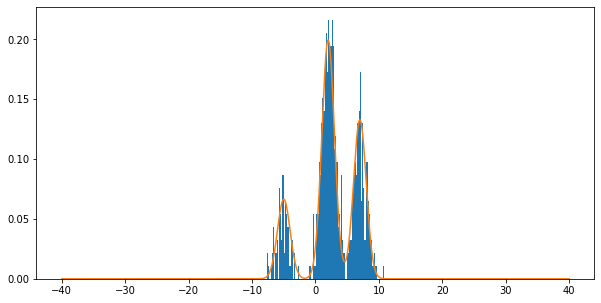

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# stored as array the values of mean and SDs and mixing coefficients
# N1[2/3,-1,1] N2[1/6,0,1], N3[1/6,1,1]
mu = [-5, 2, 7]
sigma = [1, 1, 1]
p_i = [1/6, 1/2, 1/3]
n = 500

# empty array
x = []
for i in range(n):
    z_i = np.argmax(np.random.multinomial(1, p_i))
    x_i = np.random.normal(mu[z_i], sigma[z_i])
    x.append(x_i)

X = np.array(x)
X = np.reshape(X,(n,-1))
def univariate_normal(x, mean, variance):
    return ((1. / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance)))

a = np.arange(-40, 40, 0.01)
y = p_i[0] * univariate_normal(a, mean=mu[0], variance=sigma[0]**2) + p_i[1] * univariate_normal(a, mean=mu[1], variance=sigma[0]**2)+ p_i[2] * univariate_normal(a, mean=mu[2], variance=sigma[0]**2)

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(x, bins=100, density=True)
ax.plot(a, y)

In [ ]:
gmm.i_em(X)
n_iter = 100
# Saving log-likelihood
log_likelihood = [gmm.llh(X)]
for e in range(n_iter):
    # E-step
    gmm.e_step()
    print("Iteration: {}".format(e+1))
    # M-step
    #gmm.m_step()
    z = gmm.update()
    if(z==1):
       break
    # Computing log-likelihood
    log_likelihood.append(gmm.llh(X))
    print("\nlog-likelihood: {:.8f}".format(log_likelihood[-1]))
    print("\n")

Mean: 
[[ 4.25939726]
 [ 0.56457888]
 [10.87144665]]

Covariance: 
[[[6.94019229e+00]]

 [[1.97119076e+01]]

 [[1.00000000e-04]]]

Mixing Coeff.: 
[0.56268622 0.435467   0.00184678]
Iteration: 1

log-likelihood: -1379.17335251


Mean: 
[[ 4.25284727]
 [ 0.46427871]
 [10.87144665]]

Covariance: 
[[[6.91967883e+00]]

 [[1.97703454e+01]]

 [[1.00000000e-04]]]

Mixing Coeff.: 
[0.57519944 0.42295802 0.00184254]
Iteration: 2

log-likelihood: -1378.75007580


Mean: 
[[ 4.24470942]
 [ 0.36467825]
 [10.87144665]]

Covariance: 
[[[6.92665852e+00]]

 [[1.97936616e+01]]

 [[1.00000000e-04]]]

Mixing Coeff.: 
[0.5872539  0.41090013 0.00184596]
Iteration: 3

log-likelihood: -1378.35134759


Mean: 
[[ 4.23624152]
 [ 0.264659  ]
 [10.87144665]]

Covariance: 
[[[6.94066419e+00]]

 [[1.97968560e+01]]

 [[1.00000000e-04]]]

Mixing Coeff.: 
[0.59884537 0.39930544 0.0018492 ]
Iteration: 4

log-likelihood: -1377.97411495


Mean: 
[[ 4.22788729]
 [ 0.16390074]
 [10.87144665]]

Covariance: 
[[[6.95613722e+00